In [9]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split                                                                                                                                                                                                                                                                                                                                                                                              
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import numpy as np
import matplotlib as plt

In [13]:
df_molecules = pd.read_csv('filtered_molecules.csv')
df_descriptors = df_molecules.drop("SMILES", axis=1)
df_descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_urea,fr_Al_COO,fr_C_S,fr_Imine,fr_barbitur,fr_dihydropyridine,fr_guanido,fr_lactone,fr_oxazole,fr_priamide
0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,58,...,0,0,0,0,0,0,0,0,0,0
1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,88,...,0,0,0,0,0,0,0,0,0,0
2,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,84,...,0,0,0,0,0,0,0,0,0,0
3,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,88,...,0,0,0,0,0,0,0,0,0,0
4,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,80,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print(df_descriptors.columns)

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_urea', 'fr_Al_COO', 'fr_C_S', 'fr_Imine', 'fr_barbitur',
       'fr_dihydropyridine', 'fr_guanido', 'fr_lactone', 'fr_oxazole',
       'fr_priamide'],
      dtype='object', length=184)


<Axes: >

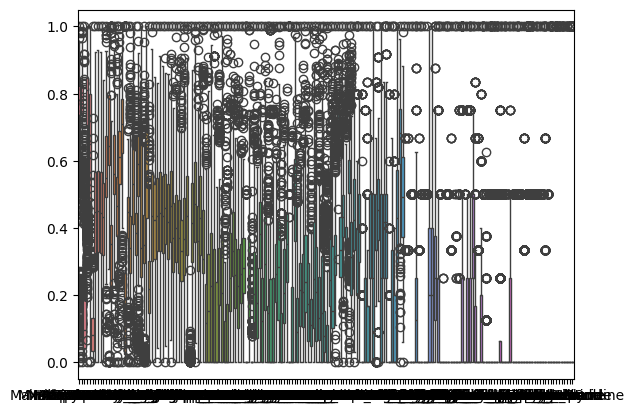

In [17]:
df_descriptors = df_descriptors.dropna()  # Delete all rows with missing values 
print(df_descriptors.describe())  # gives: mean, std, min, 25%, 505 75% and max values 

# Scaling the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_descriptors)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled, index=df_descriptors.index, columns=df_descriptors.columns)

# Applying PCA and finding the variance
pca = PCA()
pca.fit(df_scaled)
df_scaled.head()
sns.boxplot(data=df_scaled)

